In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tnrange
from sklearn.metrics import explained_variance_score

In [2]:
V_ap = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/data/V_diff_stimseed1.npy")
V_na = np.load("/media/hdd01/sklee/CA1_clust4-60/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[:,:50000].flatten()
V_nona = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[:,:50000].flatten()
V_full = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[:,:50000].flatten()
V_na_nona = np.load("/media/hdd01/sklee/CA1_clust4-60/data/V_diff_stimseed1.npy")

V_na_diff = np.zeros((V_ap.shape[0]))
V_nona_diff = np.zeros((V_ap.shape[0]))
V_full_diff = np.zeros((V_full.shape[0]))
V_na_nona_diff = np.zeros((V_na_nona.shape[0]))
V_na_diff[:-1] = np.diff(V_na)
V_nona_diff[:-1] = np.diff(V_nona)
V_full_diff[:-1] = np.diff(V_full)
V_na_nona_diff[:-1] = np.diff(V_na_nona)

V_pred_nona_mean = np.mean(np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy"))
V_pred_nona = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/gru_s10_h20_extra_output.npz")["test"].flatten() + V_pred_nona_mean
V_pred_na = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/gru_s10_h20_extra_output.npz")["test"].flatten()
V_pred = V_pred_na + V_pred_nona

V_pred_whole_mean = np.mean(np.load("/media/hdd01/sklee/CA1_clust4-60/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy"))
V_pred_whole = np.load("/media/hdd01/sklee/CA1_clust4-60/whole/gru_s10_h20_extra_output.npz")["test"].flatten() + V_pred_whole_mean

V_pred_diff = np.zeros((V_pred.shape[0]))
V_pred_diff[:-1] = np.diff(V_pred)
V_pred_whole_diff = np.zeros((V_pred_whole.shape[0]))
V_pred_whole_diff[:-1] = np.diff(V_pred_whole)
V_pred_nona_diff = np.zeros((V_pred_nona.shape[0]))
V_pred_nona_diff[:-1] = np.diff(V_pred_nona)


In [3]:
print(np.min(V_pred_whole), np.max(V_pred_whole))
print(np.min(V_pred_whole_diff), np.max(V_pred_whole_diff))

print(np.min(V_pred), np.max(V_pred_whole))
print(np.min(V_pred_diff), np.max(V_pred_diff))

print(np.min(V_na_nona), np.max(V_na_nona))
print(np.min(V_na_nona_diff), np.max(V_na_nona_diff))

-68.88073255285688 -56.83449269995161
-0.909349799156189 2.579570949077606
-68.60308776282744 -56.83449269995161
-1.6805839238222688 1.8810050189495087
-1.0810319766016292 5.015018467484026
-0.3373805473664717 0.5222622155293948


In [4]:
raw_times = np.where(V_ap >= 3)[0]
spk_times = []

for i in range(raw_times.shape[0]):
    if i == 0:
        spk_times.append(raw_times[i])
    else:
        if raw_times[i-1] != raw_times[i] - 1:
            spk_times.append(raw_times[i])
            
spk_times = np.asarray(spk_times)
print(spk_times.shape[0])

spk = np.zeros((V_ap.shape[0]))
spk[spk_times] = 1

#spk = spk[-20*50000:]
test_spk = spk[-20*50000:]
spk = spk[:980*50000]

print(np.sum(spk))

9122
8924.0


In [5]:
V_ap = V_ap[:980*50000]
V_na = V_na[:980*50000]
V_nona = V_nona[:980*50000]
V_na_diff = V_na_diff[:980*50000]
V_nona_diff = V_nona_diff[:980*50000]
V_pred = V_pred[:980*50000]
V_pred_whole = V_pred_whole[:980*50000]
V_pred_diff = V_pred_diff[:980*50000]
V_pred_whole_diff = V_pred_whole_diff[:980*50000]
V_pred_nona = V_pred_nona[:980*50000]
V_pred_nona_diff = V_pred_nona_diff[:980*50000]
V_full = V_full[:980*50000]
V_full_diff = V_full_diff[:980*50000]
V_na_nona = V_na_nona[:980*50000]
V_na_nona_diff = V_na_nona_diff[:980*50000]

In [6]:
diff_min = -1
diff_max = 1
val_max = -56
val_min = -63

#diff_min = -0.5
#diff_max = 2
#val_max = -57
#val_min = -61

#diff_min = -63
#diff_max = -56
#val_max = 5
#val_min = 1

val_interval = 0.1
diff_interval = 0.1

V = V_na
V_diff = V_na_diff

diff_bins = np.arange(diff_min, diff_max+0.001, diff_interval)
val_bins = np.arange(val_min, val_max+0.001, val_interval)
spk_2d_probs = np.empty((val_bins.shape[0]-1, diff_bins.shape[0]-1))

counts_2d = np.empty((val_bins.shape[0]-1, diff_bins.shape[0]-1))

for i in tnrange(val_bins.shape[0]-1):
    for j in range(diff_bins.shape[0]-1):
        #idx = np.where((V_na>=val_bins[i]) & (V_na<val_bins[i+1]) & (V_na_diff>=diff_bins[j]) & (V_na_diff<diff_bins[j+1]))[0]
        #idx = np.where((V_nona>=val_bins[i]) & (V_nona<val_bins[i+1]) & (V_nona_diff>=diff_bins[j]) & (V_nona_diff<diff_bins[j+1]))[0]
        #idx = np.where((V_pred>=val_bins[i]) & (V_pred<val_bins[i+1]) & (V_pred_diff>=diff_bins[j]) & (V_pred_diff<diff_bins[j+1]))[0]
        #idx = np.where((V_pred_whole>=val_bins[i]) & (V_pred_whole<val_bins[i+1]) & (V_pred_whole_diff>=diff_bins[j]) & (V_pred_whole_diff<diff_bins[j+1]))[0]
        #idx = np.where((V_nona>=val_bins[i]) & (V_nona<val_bins[i+1]) & (V_nona_diff>=diff_bins[j]) & (V_nona_diff<diff_bins[j+1]))[0]
        #idx = np.where((V_pred_nona>=val_bins[i]) & (V_pred_nona<val_bins[i+1]) & (V_pred_nona_diff>=diff_bins[j]) & (V_pred_nona_diff<diff_bins[j+1]))[0]
        #idx = np.where((V_full>=val_bins[i]) & (V_full<val_bins[i+1]) & (V_full_diff>=diff_bins[j]) & (V_full_diff<diff_bins[j+1]))[0]
        #idx = np.where((V_na_nona>=val_bins[i]) & (V_na_nona<val_bins[i+1]) & (V_na_nona_diff>=diff_bins[j]) & (V_na_nona_diff<diff_bins[j+1]))[0]
        idx = np.where((V>=val_bins[i]) & (V<val_bins[i+1]) & (V_diff>=diff_bins[j]) & (V_diff<diff_bins[j+1]))[0]
        yes_count = np.sum(spk[idx])
        total_count = idx.shape[0]
        
        if total_count ==0:
            spk_2d_probs[i,j] = 0
            counts_2d[i,j] = 1
        else:
            spk_2d_probs[i,j] = yes_count / total_count
            counts_2d[i,j] = total_count

<ipython-input-6-9559eebd290c>:28: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(val_bins.shape[0]-1):


  0%|          | 0/70 [00:00<?, ?it/s]

In [7]:
bins = np.arange(val_min, val_max+0.001, val_interval)
spk_probs = np.empty((bins.shape[0]-1))
counts = np.empty((bins.shape[0]-1))

for i in tnrange(bins.shape[0]-1):
    #idx = np.where((V_na >= bins[i]) & (V_na < bins[i+1]))[0]
    #idx = np.where((V_nona >= bins[i]) & (V_nona < bins[i+1]))[0]
    #idx = np.where((V_pred >= bins[i]) & (V_pred < bins[i+1]))[0]
    #idx = np.where((V_pred_whole >= bins[i]) & (V_pred_whole < bins[i+1]))[0]
    #idx = np.where((V_nona >= bins[i]) & (V_nona < bins[i+1]))[0]
    #idx = np.where((V_pred_nona >= bins[i]) & (V_pred_nona < bins[i+1]))[0]
    #idx = np.where((V_full >= bins[i]) & (V_full < bins[i+1]))[0]
    #idx = np.where((V_na_nona >= bins[i]) & (V_na_nona < bins[i+1]))[0]
    idx = np.where((V >= bins[i]) & (V < bins[i+1]))[0]
    yes_count = np.sum(spk[idx])
    total_count = idx.shape[0]
    spk_probs[i] = yes_count / total_count
    counts[i] = total_count

<ipython-input-7-f8c5c6485103>:5: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(bins.shape[0]-1):


  0%|          | 0/70 [00:00<?, ?it/s]

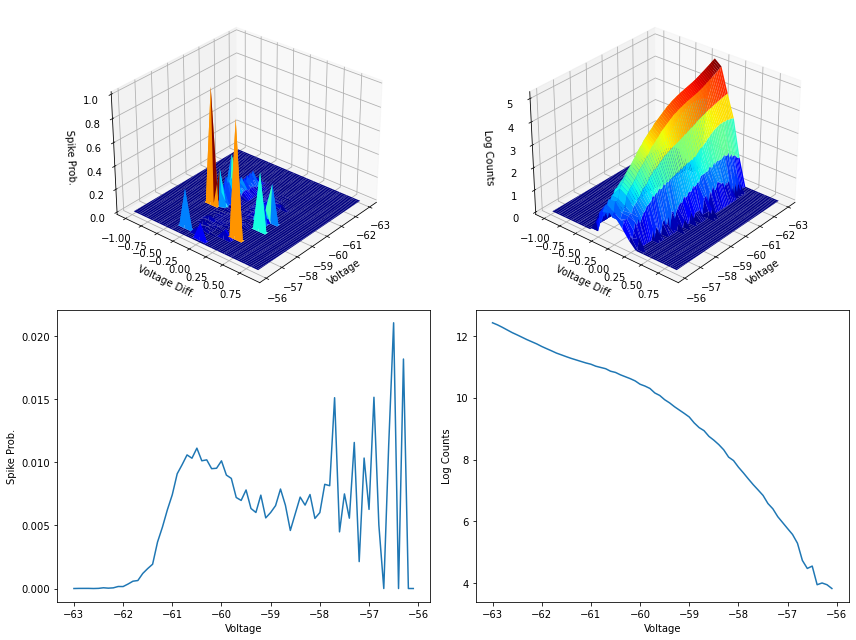

In [9]:
fig = plt.figure(figsize=(12,9))

ax1 = fig.add_subplot(2,2,1, projection='3d')
X, Y = np.meshgrid(val_bins[:-1], diff_bins[:-1])
probs1 = ax1.plot_surface(X, Y, spk_2d_probs.T, rstride=1, cstride=1,
                cmap='jet', edgecolor='none')
ax1.set_xlabel('Voltage')
ax1.set_ylabel('Voltage Diff.')
ax1.set_zlabel('Spike Prob.')
ax1.view_init(30, 40)

ax2 = fig.add_subplot(2,2,2, projection='3d')
probs1 = ax2.plot_surface(X, Y, np.log10(counts_2d.T), rstride=1, cstride=1,
                cmap='jet', edgecolor='none')
ax2.set_xlabel('Voltage')
ax2.set_ylabel('Voltage Diff.')
ax2.set_zlabel('Log Counts')
ax2.view_init(30, 40)

"""
ax3 = fig.add_subplot(2,2,3)
extent = [val_min, val_max, diff_max, diff_min]
imshow1 = ax3.imshow(spk_2d_probs.T, extent=extent)
ax4 = fig.add_subplot(2,2,4)
imshow2 = ax4.imshow(np.log10(counts_2d.T), extent=extent)
plt.colorbar(imshow1, ax=ax3, shrink = 0.4)
plt.colorbar(imshow2, ax=ax4, shrink = 0.4)

ax3.set_xlabel("Voltage")
ax3.set_ylabel("Voltage Diff.")
ax4.set_xlabel("Voltage")
ax4.set_ylabel("Voltage Diff.")
"""

ax5 = fig.add_subplot(2,2,3)
ax6 = fig.add_subplot(2,2,4)
ax5.plot(bins[:-1], spk_probs)
ax6.plot(bins[:-1], np.log(counts))
ax5.set_xlabel("Voltage")
ax5.set_ylabel("Spike Prob.")
ax6.set_ylabel("Log Counts")
ax6.set_xlabel("Voltage")

#plt.suptitle("True Sub-threshold Voltage Na", fontsize=16)
fig.tight_layout()

plt.show()

#fig.savefig("/home/sklee/dendrite/AP_emp_PredNoNa.pdf", bbox_inches="tight", transparent=True)

In [10]:
test_V_na = np.load("/media/hdd01/sklee/CA1_clust4-60/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[:,:50000].flatten()[-20*50000:]
test_V_na_diff = np.zeros((test_V_na.shape[0]))
test_V_na_diff[:-1] = np.diff(test_V_na)

test_V_full = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[:,:50000].flatten()[-20*50000:]
test_V_full_diff = np.zeros((test_V_full.shape[0]))
test_V_full_diff[:-1] = np.diff(test_V_full)

test_V_na_nona = np.load("/media/hdd01/sklee/CA1_clust4-60/data/V_diff_stimseed1.npy")[-20*50000:]
test_V_na_nona_diff = np.zeros((test_V_na_nona.shape[0]))
test_V_na_nona_diff[:-1] = np.diff(test_V_na_nona)

test_V_pred_nona = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/gru_s10_h20_output.npz")["test"].flatten() + V_pred_nona_mean
test_V_pred_na = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/gru_s10_h20_output.npz")["test"].flatten()
test_V_pred_whole = np.load("/media/hdd01/sklee/CA1_clust4-60/whole/gru_s10_h20_output.npz")["test"].flatten() + V_pred_whole_mean
test_V_pred = test_V_pred_nona + test_V_pred_na
test_V_pred_diff = np.zeros((test_V_pred.shape[0]))
test_V_pred_whole_diff = np.zeros((test_V_pred_whole.shape[0]))
test_V_pred_diff[:-1] = np.diff(test_V_pred)
test_V_pred_whole_diff[:-1] = np.diff(test_V_pred_whole)

test_V = test_V_na
test_V_diff = test_V_na_diff

test_S = np.zeros((test_V.shape[0]))
test_P = np.zeros((test_V.shape[0]))

for i in tnrange(val_bins.shape[0]-1):
    for j in range(diff_bins.shape[0]-1):
        test_idx = np.where((test_V>=val_bins[i]) & (test_V<val_bins[i+1]) & (test_V_diff>=diff_bins[j]) & (test_V_diff<diff_bins[j+1]))[0]
        #prob = spk_2d_probs[i,j]
        #test_spk_prob = np.ones((test_idx.shape[0])) * prob
        spk_sample = np.random.binomial(n=1, p=spk_2d_probs[i,j], size=test_idx.shape[0])
        test_S[test_idx] = spk_sample
        test_P[test_idx] = spk_2d_probs[i,j]
        
test_P[test_P == 0] = 0.000001
test_P[test_P == 1] = 0.999999

nll = -test_spk*np.log(test_P) - (1-test_spk)*np.log(1-test_P)
nll_mean = np.mean(nll)
print(nll_mean)

<ipython-input-10-11729f724a39>:28: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(val_bins.shape[0]-1):


  0%|          | 0/70 [00:00<?, ?it/s]

0.001144777601771456


In [ ]:
# V_na: 0.001144777601771456
# V_na_pred: 0.0012068725929324316
# V_whole_pred: 0.0012279335425255387
# V_nona_pred: 0.0012638487195548655
# V_full:
# V_na_nona: 

0.16666666666666666


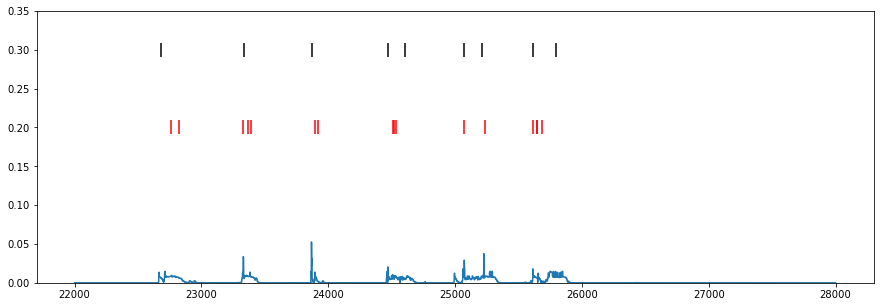

In [11]:
plt.figure(figsize = (15,5))
plt.scatter(np.arange(50000)[22000:28000], test_S[-50000:][22000:28000]*0.3-0.1, s=200, marker="|", color="red")
plt.scatter(np.arange(50000)[22000:28000], test_spk[-50000:][22000:28000]*0.4-0.1, s=200, marker="|", color="black")
plt.plot(np.arange(50000)[22000:28000], test_P[-50000:][22000:28000])
plt.ylim(0, 0.35)
print(np.max(test_P))

In [12]:
V_ap = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[:,:50000].flatten()
V_na = np.load("/media/hdd01/sklee/CA1_clust4-60/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[:,:50000].flatten()
V_nona = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[:,:50000].flatten()

In [13]:
V_ap_na = V_ap - V_na
V_ap_nona = V_ap - V_nona
V_na_nona = V_na - V_nona

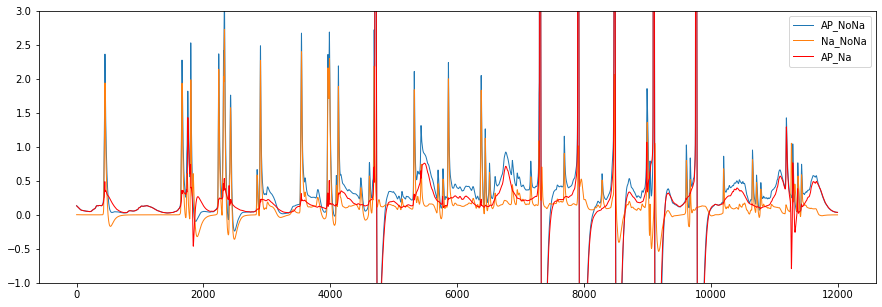

In [14]:
plt.figure(figsize = (15,5))

plt.plot(V_ap_nona[:50000][16000:28000], label="AP_NoNa", linewidth=1)
plt.plot(V_na_nona[:50000][16000:28000], label="Na_NoNa", linewidth=1)
plt.plot(V_ap_na[:50000][16000:28000], label="AP_Na", linewidth=1, color="red")
plt.ylim(-1,3)
plt.legend()

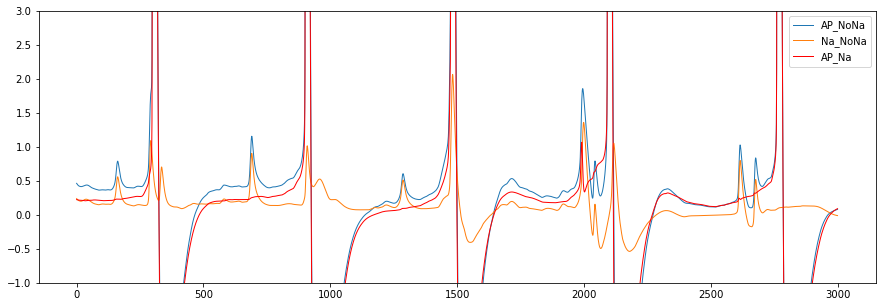

In [15]:
plt.figure(figsize = (15,5))

plt.plot(V_ap_nona[:50000][16000:28000][7000:10000], label="AP_NoNa", linewidth=1)
plt.plot(V_na_nona[:50000][16000:28000][7000:10000], label="Na_NoNa", linewidth=1)
plt.plot(V_ap_na[:50000][16000:28000][7000:10000], label="AP_Na", linewidth=1, color="red")
plt.ylim(-1,3)
#plt.xlim(4500,5000)
plt.legend()

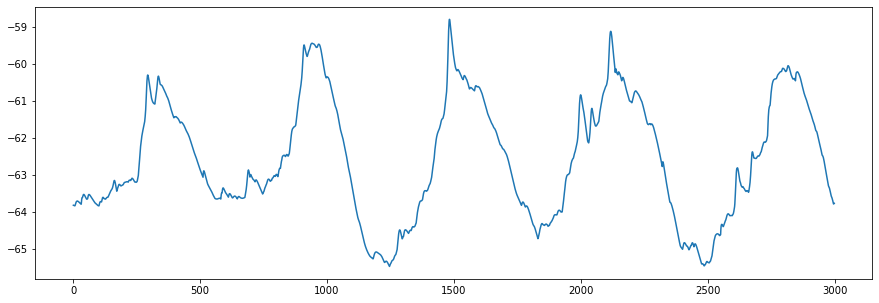

In [16]:
plt.figure(figsize = (15,5))
plt.plot(V_na[:50000][16000:28000][7000:10000])

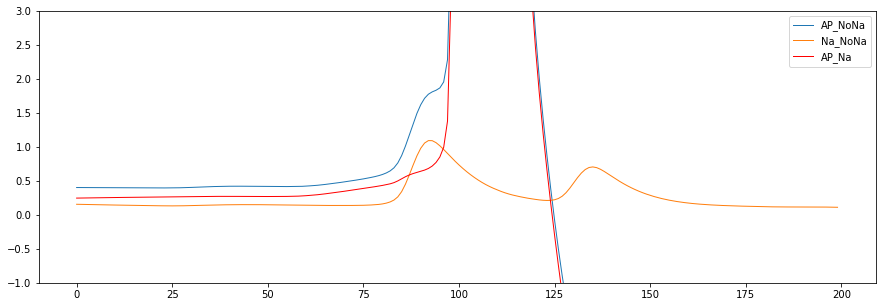

In [17]:
plt.figure(figsize = (15,5))

plt.plot(V_ap_nona[:50000][16000:28000][7200:7400], label="AP_NoNa", linewidth=1)
plt.plot(V_na_nona[:50000][16000:28000][7200:7400], label="Na_NoNa", linewidth=1)
plt.plot(V_ap_na[:50000][16000:28000][7200:7400], label="AP_Na", linewidth=1, color="red")
plt.ylim(-1,3)
#plt.xlim(4500,5000)
plt.legend()

In [7]:
V_ap = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[:,:50000]
V_na = np.load("/media/hdd01/sklee/CA1_clust4-60/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[:,:50000]
V_nona = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[:,:50000]

In [8]:
V_ap_na = V_ap - V_na
V_ap_nona = V_ap - V_nona
V_na_nona = V_na - V_nona

In [11]:
whole_pred_test = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/whole_pred/gru_h20_test.npy")
comb_pred_test = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/comb_pred/gru_h20_test.npy")
nona_test = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/nona/gru_h20_test.npy")
print(whole_pred_test.shape)

(20, 20000)


In [12]:
var_exp = np.empty((3,20))

for i in range(20):
    var_exp[0,i] = explained_variance_score(V_ap_na[i+980][12000:32000], comb_pred_test[i])
    var_exp[1,i] = explained_variance_score(V_ap_na[i+980][12000:32000], whole_pred_test[i])
    var_exp[2,i] = explained_variance_score(V_ap_na[i+980][12000:32000], nona_test[i])

<BarContainer object of 3 artists>

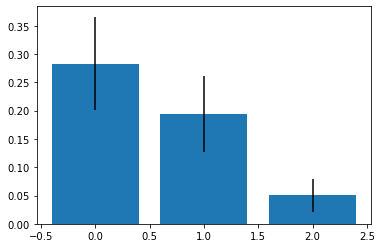

In [17]:
plt.bar(np.arange(3), np.mean(var_exp, 1), yerr=np.std(var_exp, 1))

(7500.0, 15000.0)

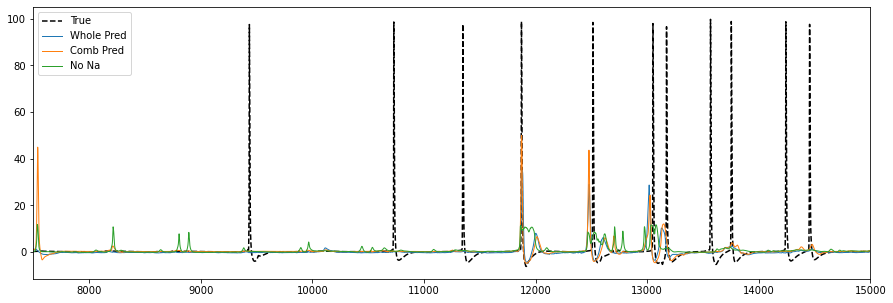

In [31]:
idx = np.random.randint(0,19)

plt.figure(figsize=(15,5))
plt.plot(V_ap_na[idx*50000:(idx+1)*50000][12000:32000], color="black", label="True", linestyle="--")
plt.plot(whole_pred_test[idx], label="Whole Pred", linewidth=1)
plt.plot(comb_pred_test[idx], label="Comb Pred", linewidth=1)
plt.plot(nona_test[idx], label="No Na", linewidth=1)
plt.legend()

#plt.ylim(-1,10)
plt.xlim(7500,15000)

In [3]:
#na_train = np.load("/media/hdd01/sklee/CA1_clust4-60/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[:980,:50000]
#na_test = np.load("/media/hdd01/sklee/CA1_clust4-60/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[980:,:50000]
#nona_train = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/gru_s10_h20_extra_output.npz")["test"]
#nona_test = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/gru_s10_h20_output.npz")["test"]

na_train = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/gru_s10_h20_extra_output.npz")["test"]
na_test = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/gru_s10_h20_output.npz")["test"]
nona_train = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[:980,:50000]
nona_test = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[980:,:50000]

train = na_train + nona_train
test = na_test + nona_test
full = np.vstack((train, test))


In [4]:
#np.save("/media/hdd01/sklee/CA1_clust4-60_AP/na_pred_nona_true/V_na_pred_nona_true.npy", full)

In [3]:
na_true_nona_pred = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/na_true_nona_pred/gru_h30_test.npy")
na_pred_nona_true = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/na_pred_nona_true/gru_h30_test.npy")
na_true = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/na_true/gru_h30_test.npy")
comb_pred = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/comb_pred/gru_h30_test.npy")
whole_pred = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/whole_pred/gru_h30_test.npy")
true = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/data/V_diff_stimseed1.npy")[980*50000:].reshape(-1,50000)

In [4]:
var_exp = np.empty((20,5))
for i in tnrange(20):
    var_exp[i,0] = explained_variance_score(true[i], na_true[i])
    var_exp[i,1] = explained_variance_score(true[i], whole_pred[i])
    var_exp[i,2] = explained_variance_score(true[i], comb_pred[i])
    var_exp[i,3] = explained_variance_score(true[i], na_true_nona_pred[i])
    var_exp[i,4] = explained_variance_score(true[i], na_pred_nona_true[i])

<ipython-input-4-010c6ef4d5c6>:2: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(20):


  0%|          | 0/20 [00:00<?, ?it/s]

Text(0, 0.5, 'Variance Explained')

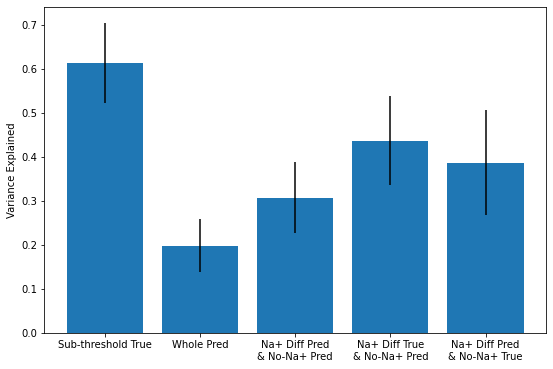

In [15]:
plt.figure(figsize = (9,6))
plt.bar(["Sub-threshold True", "Whole Pred", "Na+ Diff Pred\n& No-Na+ Pred", "Na+ Diff True\n& No-Na+ Pred",
              "Na+ Diff Pred\n& No-Na+ True"], np.mean(var_exp, 0), yerr=np.std(var_exp, 0))
plt.ylabel("Variance Explained")

Text(0, 0.5, 'Voltage (mV)')

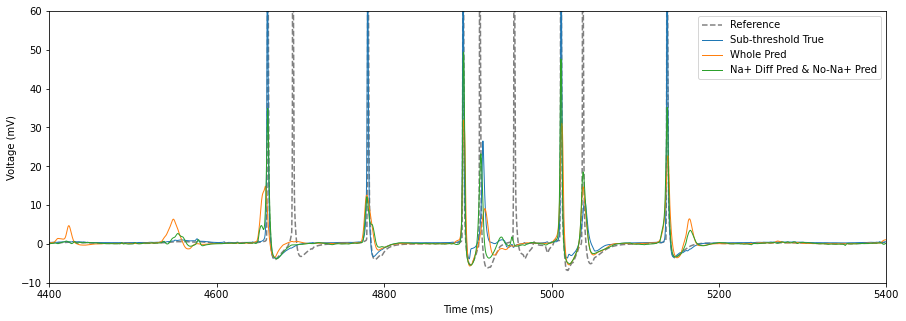

In [34]:
plt.figure(figsize = (15,5))
plt.plot(np.arange(0,10000,0.2), true[0], color="gray", linestyle="--", label="Reference")
plt.plot(np.arange(0,10000,0.2), na_true[0], label="Sub-threshold True", linewidth=1)
plt.plot(np.arange(0,10000,0.2), whole_pred[0], label="Whole Pred", linewidth=1)
plt.plot(np.arange(0,10000,0.2), comb_pred[0], label="Na+ Diff Pred & No-Na+ Pred", linewidth=1)
#plt.plot(np.arange(0,10000,0.2), na_true_nona_pred[0], label="Na+ Diff True & No-Na+ Pred", linewidth=1)
plt.legend()

plt.xlim(22000/5,27000/5)
plt.ylim(-10,60)
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (mV)")